In [1]:
from qiskit import QuantumCircuit,transpile
from qiskit.circuit.library import ZGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def diffuser(n_qubits):
    qc = QuantumCircuit(n_qubits)
    qc.h(range(n_qubits))
    qc.x(range(n_qubits))
    multi_controlled_z = ZGate().control(n_qubits-1)
    qc.append(multi_controlled_z, range(n_qubits))
    qc.x(range(n_qubits))
    qc.h(range(n_qubits))

    diffuser_gate = qc.to_gate()
    diffuser_gate.name = f'Diffuser({n_qubits}q)'

    return diffuser_gate

用于搜索 |11> 的 Grover 算法线路:


C:\Users\22595\AppData\Roaming\Python\Python313\site-packages\qiskit\visualization\circuit\matplotlib.py:272: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: C:\Users\22595\AppData\Roaming\Python\Python313\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(


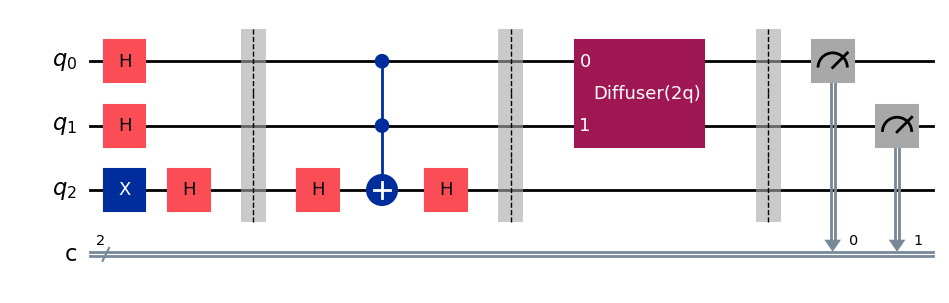

In [3]:
qc = QuantumCircuit(3, 2)

qc.h([0,1])

qc.x(2)
qc.h(2)

qc.barrier()

qc.h(2)
qc.ccx(0,1,2)
qc.h(2)


qc.barrier()


qc.append(diffuser(2),range(2))
qc.barrier()


qc.measure([0,1], [0,1])

print("用于搜索 |11> 的 Grover 算法线路:")
display(qc.draw('mpl', style='iqx'))
plt.show()

In [4]:
simulator=AerSimulator()
transpiled_qc=transpile(qc,simulator)
job=simulator.run(transpiled_qc,shots=1024)
result=job.result()

counts=result.get_counts(qc)
print(counts)

{'01': 125, '11': 659, '10': 121, '00': 119}


Text(0, 0.5, 'Counts')

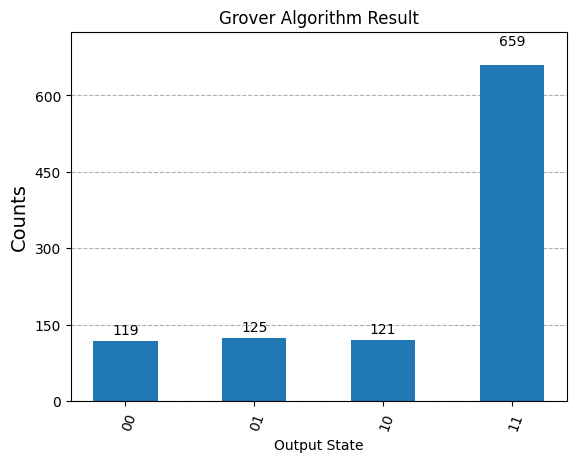

In [5]:
fig, ax = plt.subplots()

# 创建子图
plot_histogram(counts, ax=ax, title="Grover Algorithm Result", 
               bar_labels=True, color=['#1f77b4' if key != '11' else "#0e87ff" for key in counts])
ax.set_xlabel("Output State")
ax.set_ylabel("Counts")

C:\Users\22595\AppData\Roaming\Python\Python313\site-packages\qiskit\visualization\circuit\matplotlib.py:272: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: C:\Users\22595\AppData\Roaming\Python\Python313\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(


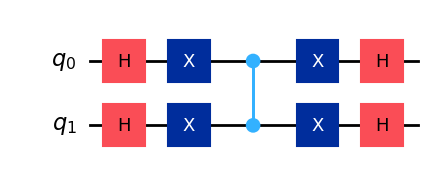

In [6]:
qc1 = QuantumCircuit(3,2)
qc1 = QuantumCircuit(2)
qc1.h(range(2))
qc1.x(range(2))
multi_controlled_z = ZGate().control(1)
qc1.append(multi_controlled_z, range(2))
qc1.x(range(2))
qc1.h(range(2))
display(qc1.draw('mpl', style='iqx'))